## Project 4: Predictive Analysis using scikit-learn

- Start with the mushroom data in the pandas DataFrame that you constructed in your “Assignment – Preprocessing Data with sci-kit learn.”
- Use scikit-learn to determine which of the two predictor columns that you selected (odor and one other column of your choice) most accurately predicts whether or not a mushroom is poisonous. There is an additional challenge here—to use scikit-learn’s predictive classifiers, you’ll want to convert each of your two (numeric categorical) predictor columns into a set of columns. See for one approach pandas get_dummies() method.
- Clearly state your conclusions along with any recommendations for further analysis.

#### Below is the mushroom data from the previous assignment

C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_4668\3809762336.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mushsub['edibility'].mask(mushsub['edibility']=='e',0, inplace=True)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_4668\3809762336.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mushsub['edibility'].mask(mushsub['edibility']=='p',1, inplace=True)
C:\Users\Sarah Bill\AppData\Local\Temp\ipykernel_4668\3809762336.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

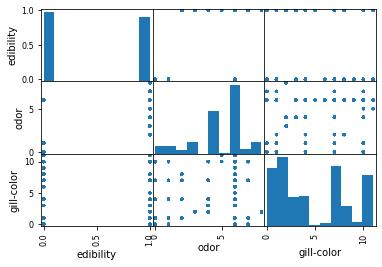

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

col = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/dataacq/main/mushroomdatadict.csv', header=None)
colnames = col.iloc[:,1]
colnames = colnames.str.strip()
mushrooms = pd.read_csv('https://raw.githubusercontent.com/sarahbill33/dataacq/main/mushroomdata.csv', header=None)
mushrooms = mushrooms.rename(columns=colnames)
mushsub = mushrooms[['edibility', 'odor', 'gill-color']]
mushsub['edibility'].mask(mushsub['edibility']=='e',0, inplace=True)
mushsub['edibility'].mask(mushsub['edibility']=='p',1, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='a',0, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='l',1, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='c',2, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='y',3, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='f',4, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='m',5, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='n',6, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='p',7, inplace=True)
mushsub['odor'].mask(mushsub['odor']=='s',8, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='k',0, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='n',1, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='b',2, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='h',3, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='g',4, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='r',5, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='o',6, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='p',7, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='u',8, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='e',9, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='w',10, inplace=True)
mushsub['gill-color'].mask(mushsub['gill-color']=='y',11, inplace=True)

mushsub = pd.DataFrame(mushsub)
mushsub['edibility'] = pd.to_numeric(mushsub['edibility'])
mushsub['odor'] = pd.to_numeric(mushsub['odor'])
mushsub['gill-color'] = pd.to_numeric(mushsub['gill-color'])

pd.plotting.scatter_matrix(mushsub)
plt.show()


#### Which is better predictor?

Use scikit-learn and predictive classifiers.

X_train's shape is  (5686, 2)
X_test's shape is  (2438, 2)
y_train's shape is  (5686,)
y_test's shape is  (2438,)


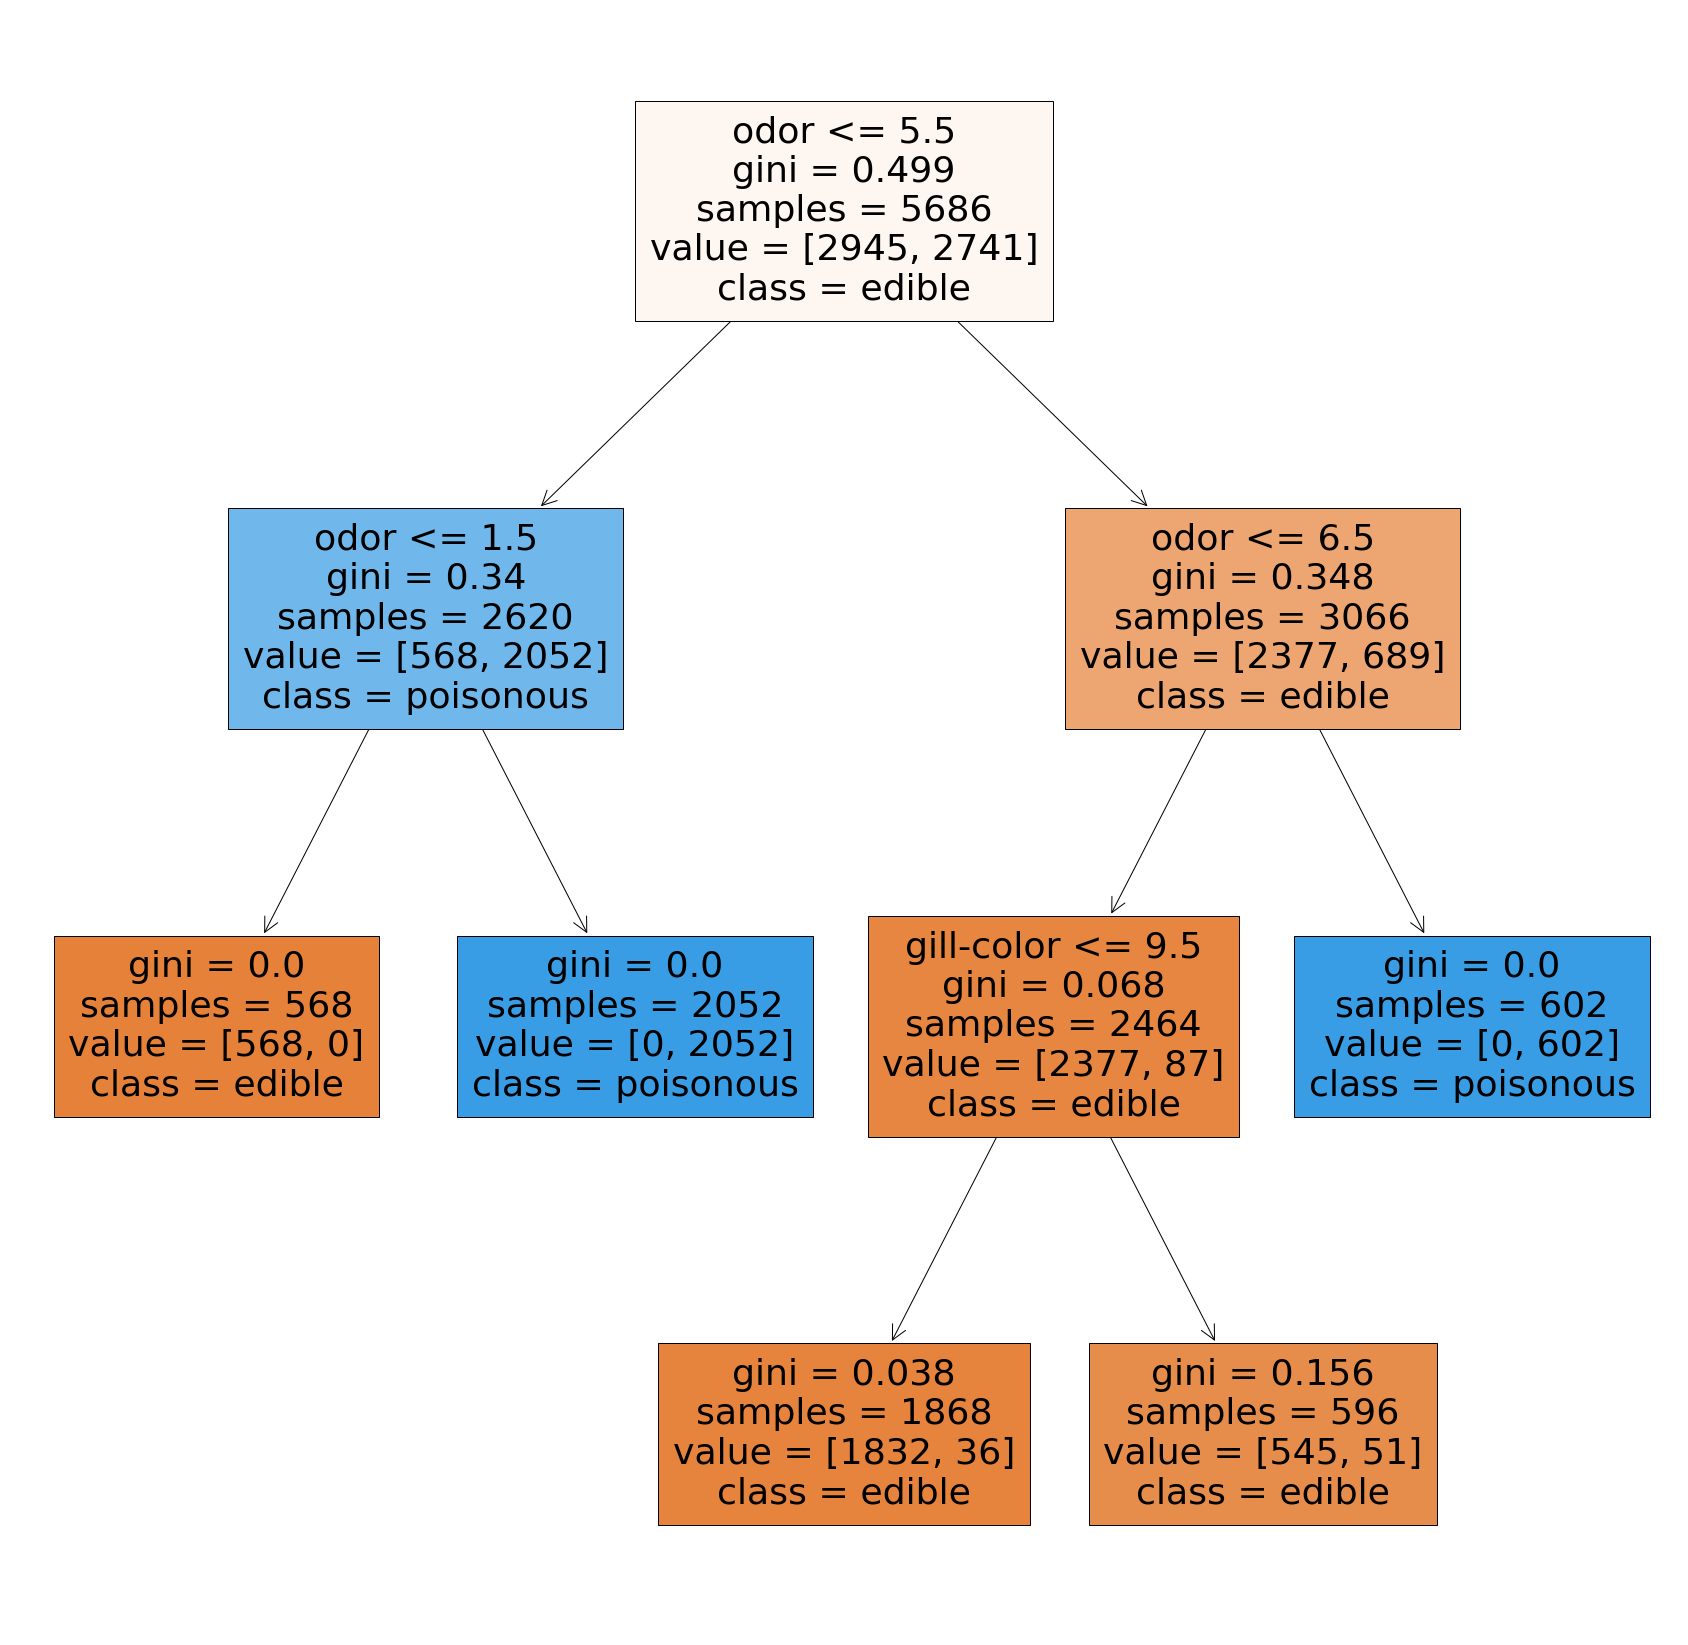

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

mushsub.loc[mushsub['edibility'] == 0, 'edibility'] = 'edible'
mushsub.loc[mushsub['edibility'] == 1, 'edibility'] = 'poisonous'
mushsub = mushsub[['odor', 'gill-color', 'edibility']]

X = mushsub.drop('edibility', axis=1)
y = mushsub['edibility']

ohe = OneHotEncoder(sparse=False)

column_transform = make_column_transformer((ohe,['odor', 'gill-color']))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)

print("X_train's shape is ", X_train.shape)
print("X_test's shape is ", X_test.shape)
print("y_train's shape is ", y_train.shape)
print("y_test's shape is ", y_test.shape)

model = DecisionTreeClassifier(max_depth=3, random_state=100)

model.fit(X_train, y_train)

plt.figure(figsize=(30, 30))
plot_tree(model, feature_names=('odor', 'gill-color'), class_names=('edible', 'poisonous'), filled=True)
plt.show()

#### Results

The results confirm some of what I predicted in the first assignment.

Odors above 2 and above 7 are correlated with poisonous mushrooms.
Odors less than 2 are correlated with edible mushrooms.

Although I predicted that gill color could be used to predict edibility, the decision tree does not seem to confirm this.
